# CREDIT VALUES EDA AND ANALYSIS

# GOAL

**The purpose of this analysis is to find relevant values from a credit table where every query and result are part of EBAC's knowledge.**

*EBAC: Escola Britânica de Artes Criativas e Tecnologia (British School of Creative Arts and Technology)*


# INTRODUCTION

**Every company needs to know who are their own customers and discover information about how much queries can help 
a company's profitability process.**

# Data Worked (variables)

The following is a list of customer data from the credit values table:

* idade = customer's age;
* sexo = customer's gender;
* dependentes = number of customer's dependents;
* escolaridade = customer's education level;
* estado_civil = marital status;
* salario_anual = one year customer's salary;
* tipo_cartao = customer's card type;
* qtd_produtos = number of products purchased in the last 12 months;
* iteracoes_12m = number of iterations in the last 12 months;
* meses_inativo_12m = number of months the customer has been inactive;
* limite_credito = customer's credit limit;
* valor_transacoes_12m = value of transactions in the last 12 months;
* qtd_transacoes_12m = number of transactions in the last 12 months.

The above list presents data which were created on AWS Athena and S3 Bucket from Amazon database.
The full version is avaliable at the following link:

https://github.com/guilherme-emschermann/guilherme-emschermann

**note:** The above database link presents a credit values table with more rows and columns.


# DATA EXPLORATION

First of all, it is necessary to understand what the credit table can show in general. Consulting the first 10 rows from the credit table will demonstrate what this database presents.

**Query 1:** SELECT * FROM "tabelacredito" LIMIT 10;
![](https://github.com/marianeneiva/sqlEBAC/blob/main/limit10.png?raw=true)

**During data process, it is common to find values written as "na". In this case, "na" means null values, then sometimes before running a query, it will be important to execute data without null values. This situation can happen to anyone in any table, so it is important to check the entire database.**

**note: inside salario_anual column, "menos que" = "less than";**

As the system presents, there are some columns which do not have number values, but different text values: 


**Query 2:** SELECT DISTINCT sexo FROM tabelacredito where sexo != 'na';

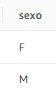

> * F = Female;
> * M = Male.


**Query 3:** SELECT DISTINCT escolaridade FROM tabelacredito where escolaridade != 'na';

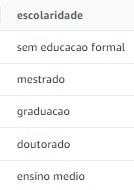

> * sem educacao formal = no formal education;
> * mestrado = master degree;
> * graduacao = college graduation;
> * doutorado = doctorate degree;
> * ensino medio = high school.


**Query 4:** SELECT DISTINCT estado_civil FROM tabelacredito where estado_civil != 'na';

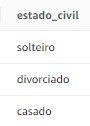

> * solteiro = single;
> * divorciado = divorced;
> * casado = married.
 

In the beginning of the file, it was said that the version worked has less rows and columns than original version:

**Query 5:** SELECT COUNT (*) FROM "tabelacredito";
> 2564 rows

The following is the format variables worked on the table:

**Query 6:** DESCRIBE TabelaCredito;

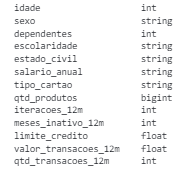



# DATA ANALYSIS

This analysis is aimed to find most profitable and less profitable customers. Then, this database can help the company to start a business strategy to know what to do with these customers. The results will be useful to understand which promotions and actions should be taken.

The first thing we need to know is which variables are most important for us. As we are searching for profitable levels, so we are talking about customer loyalty. The first step of this job consists of not caring about price values, but care about customer frequency. 

Let's check which data are working on customer loyalty:

1. Number of products purchased in the last 12 months as qtd_produtos;
2. Number of iterations in the last 12 months as iteracoes_12m;
3. Number of transactions in the last 12 months as qtd_transacoes_12m;
4. Number of months the customer has been inactive as meses_inativo_12m.

# The Averages
To start the analysis, it is necessary to define a default indicator from the variables presented. This default metric will be useful to separate the least profitable customers from the most profitable ones. Therefore, calculating the average of each one and how many people are above and below this average will provide some answers we are looking for.

**Query 7:** SELECT AVG(qtd_produtos) from tabelacredito;
> Answer 4.35 = 4

**Query 8:** SELECT AVG(iteracoes_12m) from tabelacredito;
> Answer 2.57 = 3

**Query 9:** SELECT AVG(qtd_transacoes_12m) from tabelacredito;
> Answer 41.70 = 42

**Query 10:** SELECT AVG(meses_inativo_12m) from tabelacredito;
> Answer 2.27 = 2

# Frequency Division
After calculating all the averages and round both them, we can see the table does not show a client id or the client name. As the customers column does not exists on the database, a possible solution is work on the gender of the customers and group it. Moreover, finding customers who are above and below average.

**Query 11:** SELECT sexo AS Gender,
SUM(CASE WHEN qtd_produtos > (SELECT AVG(qtd_produtos) FROM TabelaCredito) THEN 1 ELSE 0 END) AS Products_ABOVE_AVERAGE, 
SUM(CASE WHEN qtd_produtos <= (SELECT AVG(qtd_produtos) FROM TabelaCredito) THEN 1 ELSE 0 END) AS Products_BELOW_AVERAGE
FROM TabelaCredito
GROUP BY sexo;

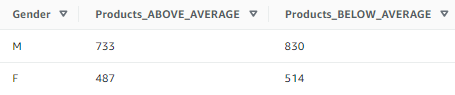

Adding the column values will show the exact value we are looking for.

Number of **most profitable customers** in relation to the number of **products purchased:**
> **Answer: 1220**

Number of **less profitable customers** in relation to the number of **products purchased:**
> **Answer: 1344**

Therefore, following this way, the program will be able to work with the remaining frequency values.

Let's check them:

**Query 12:** SELECT sexo AS Gender,
SUM(CASE WHEN iteracoes_12m > (SELECT AVG(iteracoes_12m) FROM TabelaCredito) THEN 1 ELSE 0 END) AS Iterations_ABOVE_AVERAGE, 
SUM(CASE WHEN iteracoes_12m <= (SELECT AVG(iteracoes_12m) FROM TabelaCredito) THEN 1 ELSE 0 END) AS Iterations_BELOW_AVERAGE
FROM TabelaCredito
GROUP BY sexo;

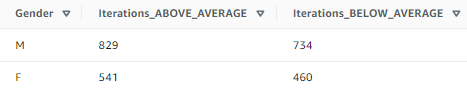

Number of **most profitable customers** in relation to the number of **iterations:**
> **Answer: 1370**

Number of **less profitable customers** in relation to the number of **iterations:**
> **Answer: 1194**

**Query 13:** SELECT sexo AS Gender,
SUM(CASE WHEN qtd_transacoes_12m > (SELECT AVG(qtd_transacoes_12m) FROM TabelaCredito) THEN 1 ELSE 0 END) AS Transactions_ABOVE_AVERAGE, 
SUM(CASE WHEN qtd_transacoes_12m <= (SELECT AVG(qtd_transacoes_12m) FROM TabelaCredito) THEN 1 ELSE 0 END) AS Transactions_BELOW_AVERAGE
FROM TabelaCredito
GROUP BY sexo;

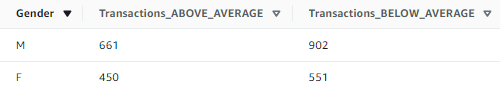

Number of **most profitable customers** in relation to the number of **transactions:**
> **Answer: 1111**

Number of **less profitable customers** in relation to the number of **transactions:**
> **Answer: 1453**

The next and last column we will need to use opposite logic. This is because the last frequency variable in our list presents the number of months the customer has been inactive. Then, the higher the value, the longer the time the customer is inactive. And, the more inactive the customer, the more the indicator is negative. In this case, the code and table is:

**Query 14:** SELECT sexo AS Gender,
SUM(CASE WHEN meses_inativo_12m >= (SELECT AVG(meses_inativo_12m) FROM TabelaCredito) THEN 1 ELSE 0 END) AS MOST_INACTIVE, 
SUM(CASE WHEN meses_inativo_12m < (SELECT AVG(meses_inativo_12m) FROM TabelaCredito) THEN 1 ELSE 0 END) AS RECENT_INACTIVES
FROM TabelaCredito
GROUP BY sexo;

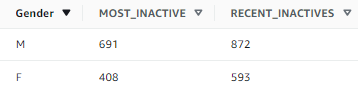

Number of **most profitable customers** in relation to the number of **months the customer has been inactive:**
> **Answer: 1465**

Number of **less profitable customers** in relation to the number of **months the customer has been inactive:**
> **Answer: 1099**

At the end of this report, some insights will be analyzed about the results found on these four divisions.

# Customer Rating

In this part of the analysis, the customer rating will validate the level of interaction between the client and the company. But, this time, a price variable needs to be added in the analysis. The value of transactions in the last 12 months will be able to bring us a better rating and accuracy.
Some values will not appear on this database because we are searching for profitability of a company in relation to the customer interaction. However, nowadays, everyone can get a valuable card or get a high credit limit.

Let's check how many customers there are in each rating.

**MOST LOYAL AND PROFITABLE CUSTOMERS**

**Query 15:** SELECT COUNT (*) AS Most_Loyal_Customers, sexo AS Gender FROM TabelaCredito 
WHERE qtd_produtos > (SELECT AVG(qtd_produtos) FROM TabelaCredito) 
AND qtd_transacoes_12m > (SELECT AVG(qtd_transacoes_12m) FROM TabelaCredito) 
AND iteracoes_12m > (SELECT AVG(iteracoes_12m) FROM TabelaCredito) 
AND valor_transacoes_12m > (SELECT AVG(valor_transacoes_12m) FROM TabelaCredito)
AND meses_inativo_12m < (SELECT AVG(meses_inativo_12m) FROM TabelaCredito)
GROUP BY sexo;

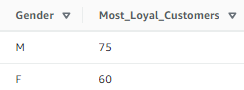

> ***Total: 135 customers***

**LESS LOYAL AND PROFITABLE CUSTOMERS**

**Query 16:** SELECT sexo AS Gender, COUNT (*) AS Most_Loyal_Customers FROM TabelaCredito 
WHERE qtd_produtos <= (SELECT AVG(qtd_produtos) FROM TabelaCredito) 
AND qtd_transacoes_12m <= (SELECT AVG(qtd_transacoes_12m) FROM TabelaCredito) 
AND iteracoes_12m <= (SELECT AVG(iteracoes_12m) FROM TabelaCredito) 
AND valor_transacoes_12m <= (SELECT AVG(valor_transacoes_12m) FROM TabelaCredito)
AND meses_inativo_12m > (SELECT AVG(meses_inativo_12m) FROM TabelaCredito)
GROUP BY sexo;

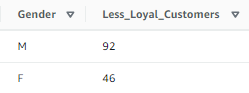

> ***Total: 138 customers***

From the beginning, this job aimed to find less and most profitable customers from the credit table. Let's check how it looks graphically:

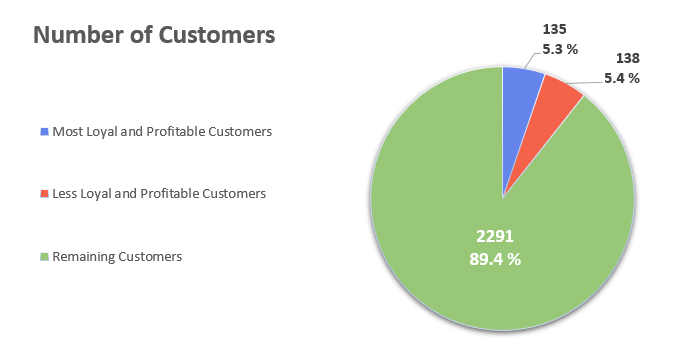


From these results, many insights were found. Firstly, two important numbers have been discovered. The information found presents both extremes from the credit table. These data can accurately show who will receive certain types of promotions or actions. This analysis has to be sent to the marketing team with some questions. These questions can help companies to grow up working on customer relationship management. Moreover, marketing teams will have an overview and better direction of what actions to take for business strategy.

# Surveys for Marketing Team

**From the Frequency Division:**

The biggest number is from most profitable customers in relation to the number of months the customer has been inactive. This high frequency above average is good news, but, **how can I make more customers less inactive?**

The second highest number and near from the last, it is less profitable customers in relation to the number of transactions. This is not good because the number of transactions at this time is about less profitable customers. **So, what kind of strategy do I need to raise the number of transactions above the average?**

Analyzing gender, it does not provide accurate result. This is because the number of men is greater than the number of women. As the proportion is not the same, only extreme values would be useful. **Why are there many men with below average transactions? Is my product more appealing to women?**

**From the Customer Rating:**

We finally found who are our less and most loyal customers. 

**What kind of promotion could I offer to the most loyal and profitable customers? Would be better offer a loyalty contract? Or maybe offer a service to keep the client on it?** 

And what about less loyal and profitable customers? **What kind of business strategy could I take to convert these 138 customers to the set of ramaining customers? Do I need to start offering low priced products to them?** Somehow, we need to create a stronger relationship with these customers.

As we can see, from 2564 clients, there are 89.4% in the middle of extremes and the company's team has to find a way to convert less profitable customers into remaining customers. At the same time, convert the number of remaining customers into most loyal and profitable customers.

**For each customer set:**

* *What should the content and layout of my e-mail be like?*
* *Which social media are my clients on?* 
* *What does this set of customers need to see from my advertising?*
* *What different strategies do I need to apply to each of the customer sets?*

# Common Customer Characteristics

For marketing management to have more precise focus, it is necessary to check whether there is common data between customers.

In this job, we will work with a sample of ten rows.

Let's take a look on most loyal and profitable customers:

**Query 17:** SELECT idade AS Age, sexo AS Gender, dependentes AS Dependents, escolaridade AS Education, estado_civil AS Marital_Status, 
salario_anual AS Annual_Salary, tipo_cartao AS Card_type, qtd_produtos AS NoProducts, iteracoes_12m AS NoIterations, 
meses_inativo_12m AS Inactive_Level, limite_credito AS Credit_Limit, valor_transacoes_12m AS Transaction_Value, 
qtd_transacoes_12m AS NoTransactions FROM TabelaCredito
WHERE qtd_produtos > (SELECT AVG(qtd_produtos) FROM TabelaCredito) 
AND qtd_transacoes_12m > (SELECT AVG(qtd_transacoes_12m) FROM TabelaCredito) 
AND iteracoes_12m > (SELECT AVG(iteracoes_12m) FROM TabelaCredito) 
AND valor_transacoes_12m > (SELECT AVG(valor_transacoes_12m) FROM TabelaCredito) 
AND meses_inativo_12m < (SELECT AVG(meses_inativo_12m) FROM TabelaCredito) 
AND escolaridade != 'na' AND estado_civil != 'na' AND salario_anual != 'na'
ORDER BY idade DESC
LIMIT 10;

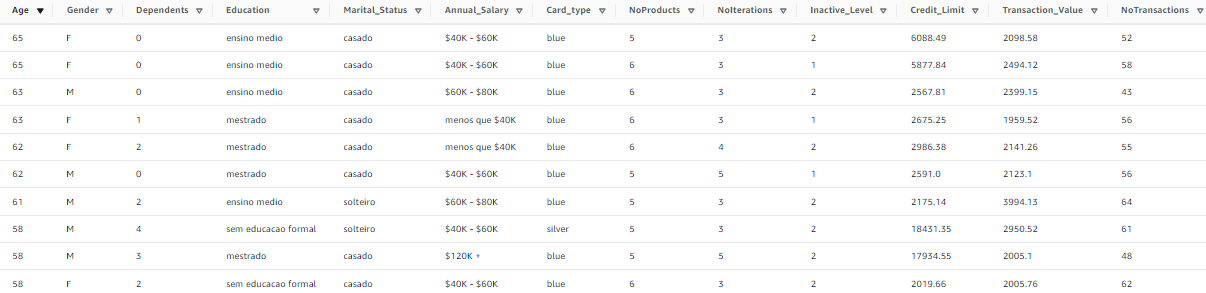

> **On this database, there are some insights we can analyze. The first data we will investigate is that which does not show stability, that is, they are not repeated.
These data is number of dependents, education level, annual salary and credit limit. No matter how high the values of these variables are, they will not tell us whether the customer has potential for loyalty with the company.**

**However, the most common characteristics that most loyal and profitable customers have:**
* All of them are not young, over 50 years old;
* Most of them are married;
* Most of them do not use platinum or gold card. The most use blue card;
* And transaction values are almost similar, all of them over $2000.

**Based on this data analysis, what  measures can I take to attract more high potential customers?**
**What kind of product or service do I need?**

> **All insights obtained will be of great importance to deliver to marketing management.**



# CONCLUSION

The objectives of the analysis were successfully completed. The structured query was able to classify customers. Through classification analysis, data found presented numerical and percentage results. Both defined classifications are necessary to manage customer relationship actions. Nowadays, every company that wants to evolve will have to use a business strategy with data analysis.